## 1) Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

## Script Contents
### Bar charts
### Histograms
### Scatterplots
### Line charts
### Sampling df

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\anon\Documents\CareerFoundry\Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
ords_prods = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_group_agg.pkl'))

In [4]:
cust_ords_prods = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'cust_ords_prods.pkl'))

In [5]:
cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,first_name,surname,gender,state,age,date_joined,num_dependents,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2) Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

<Axes: >

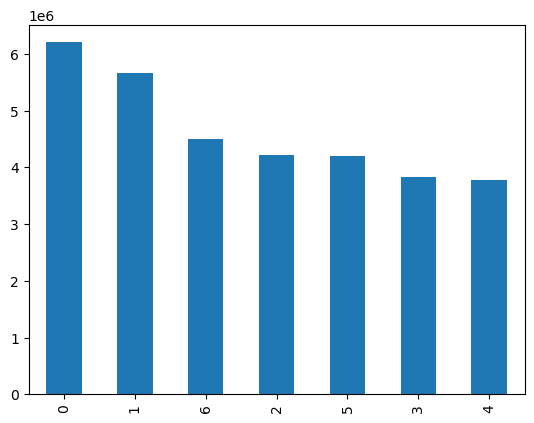

In [6]:
# Create a bar chart

ords_prods['orders_day_of_the_week'].value_counts().plot.bar()

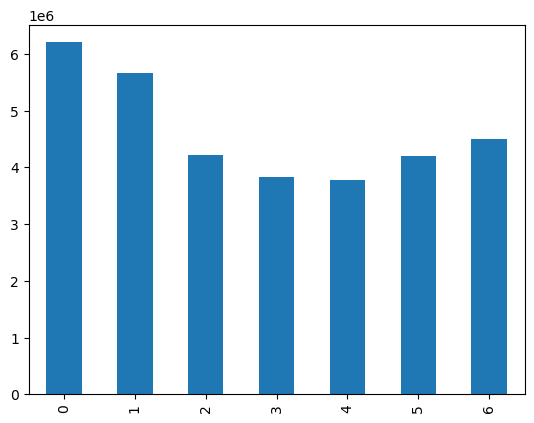

In [5]:
# Sort by index 

dow_bar = ords_prods['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

In [14]:
# Calculate order counts for day 0 and day 3

day_0_count = ords_prods[ords_prods['orders_day_of_the_week'] == 0]['order_id'].count()
day_4_count = ords_prods[ords_prods['orders_day_of_the_week'] == 4]['order_id'].count()

In [15]:
# Calculate the percentage difference

percentage_difference = ((day_0_count - day_4_count) / day_4_count) * 100

In [16]:
percentage_difference

63.966877759459926

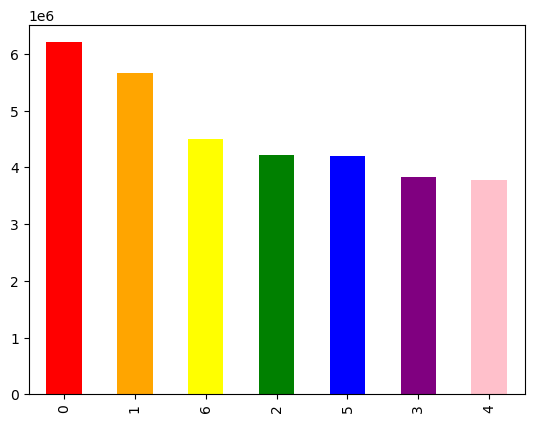

In [8]:
# Use colors

bar = ords_prods['orders_day_of_the_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

In [9]:
# Export a chart

bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_orders_dow.png'))

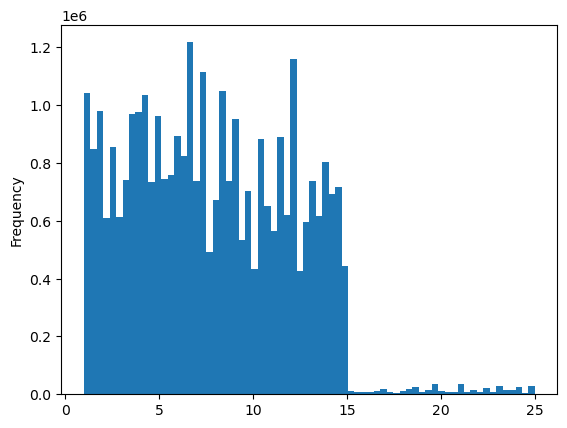

In [10]:
# Create a histogram of 'prices'

hist = ords_prods['prices'].plot.hist(bins = 70)

In [11]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_prices.png'))

In [12]:
# Creating a random sample

np.random.seed(4)

In [13]:
# Create list to hold T/F values

dev = np.random.rand(len(ords_prods)) <= 0.7

In [14]:
# Store 70% of sample in big df

big = ords_prods[dev]

In [15]:
# Store 70% of sample in small df

small = ords_prods[~dev]

In [16]:
len(ords_prods)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
df_2 = small[['orders_day_of_the_week','prices']]

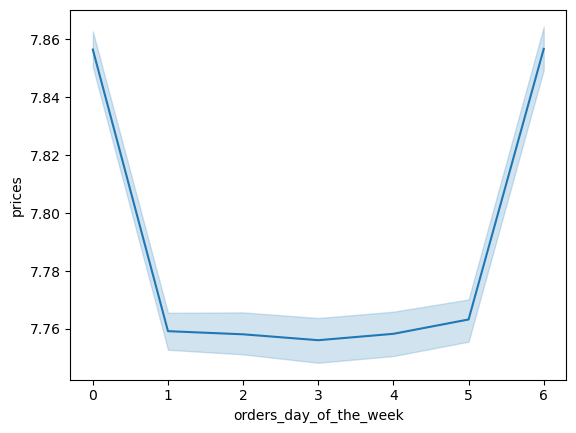

In [19]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

In [20]:
df_4 = big[['orders_day_of_the_week','prices']]

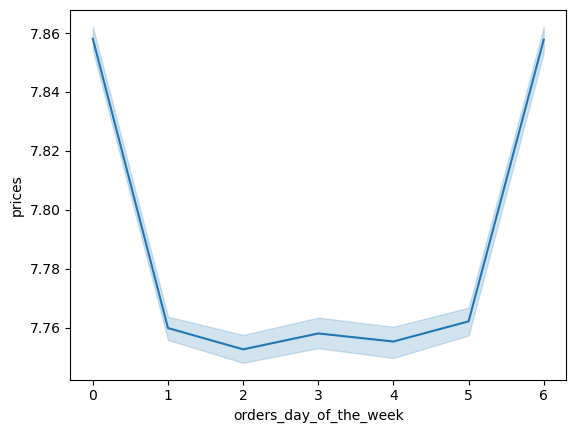

In [21]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_the_week', y = 'prices')

## 3) Create a histogram of the “order_hour_of_day” column

In [22]:
cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,first_name,surname,gender,state,age,date_joined,num_dependents,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


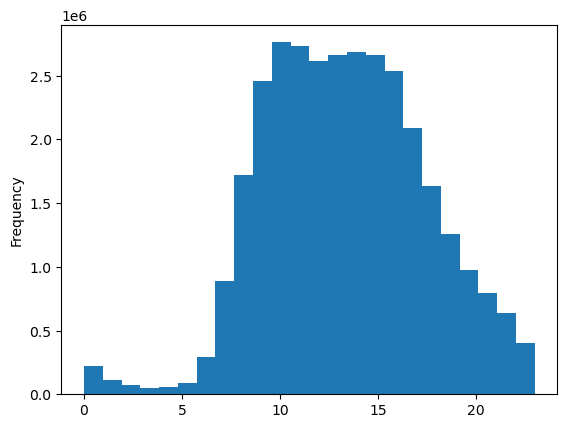

In [23]:
# Create a histogram of 'order_hour_of_day'

order_hr_of_day_hist = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

### The histogram demonstrates that the highest rates of orders occur between approximately 9:00 and 16:00. After 16:00, number of orders per hours steadily declines, with the slowest hours being between 1:00 and 6:00

In [24]:
order_hr_of_day_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'order_hr_of_day_hist.png'))

In [17]:
# Calculate order counts for 4am and 10am

hour_4_count = ords_prods[ords_prods['order_hour_of_day'] == 4]['order_id'].count()
hour_10_count = ords_prods[ords_prods['order_hour_of_day'] == 10]['order_id'].count()

In [23]:
# Calculate the percentage difference

percentage_dif = ((hour_10_count - hour_4_count) / hour_4_count) * 100

In [24]:
percentage_dif

5087.183050974794

## 4) Create a bar chart from the “loyalty_flag” column

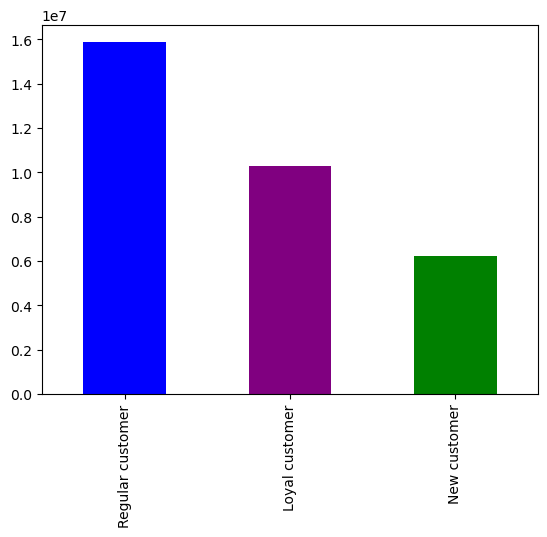

In [25]:
loyalty_flag_bar = cust_ords_prods['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])

In [26]:
loyalty_flag_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

## 5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [27]:
np.random.seed(4)

In [28]:
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
big = cust_ords_prods[dev]

In [31]:
small = cust_ords_prods[~dev]

In [32]:
len(cust_ords_prods)

32404859

In [33]:
len(big) + len(small)

32404859

In [34]:
df_3 = small[['order_hour_of_day','prices']]

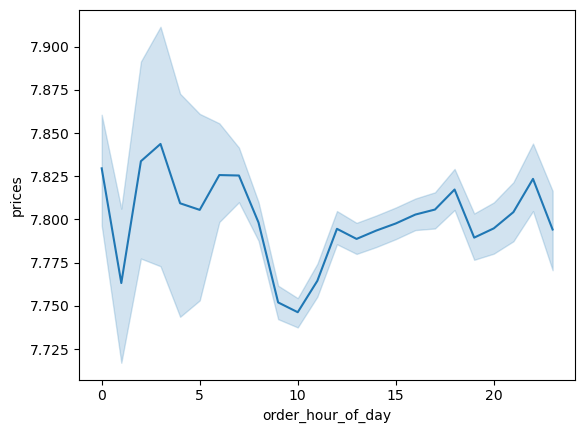

In [35]:
price_per_hour_line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [36]:
df_5 = small[['order_hour_of_day','prices']]

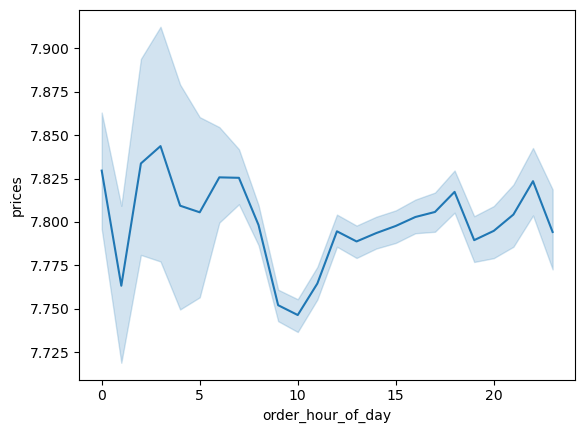

In [37]:
price_per_hour_line = sns.lineplot(data = df_5, x = 'order_hour_of_day', y = 'prices')

In [38]:
price_per_hour_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_per_hour_line.png'))

In [35]:
# Calculate price diferences between 3am and 10am

hour_3 = ords_prods[ords_prods['order_hour_of_day'] == 3]['prices'].mean()
hour_10 = ords_prods[ords_prods['order_hour_of_day'] == 10]['prices'].mean()
percent_dif = ((hour_3 - hour_10) / hour_10) * 100

In [36]:
percent_dif

1.008686896182638

### It is difficult to identify any meaningful trends in these line graphs, but it is worth noting that there is a distinct drop in prices of orders around 1:00 and then again between 9:00 and 11:00

## 6) Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [39]:
df_6 = small[['age','num_dependents']]

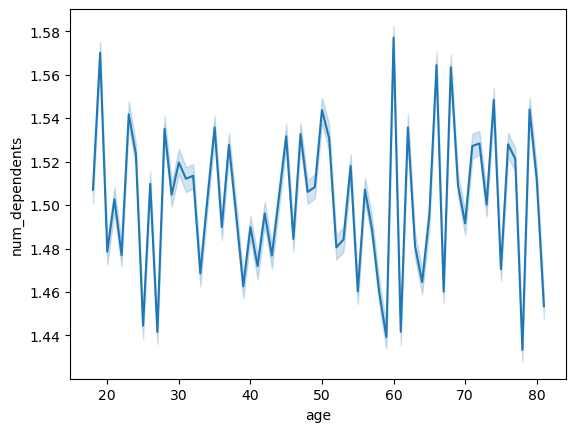

In [40]:
age_fam_line = sns.lineplot(data = df_6, x = 'age', y = 'num_dependents')

In [41]:
age_fam_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_fam_line.png'))

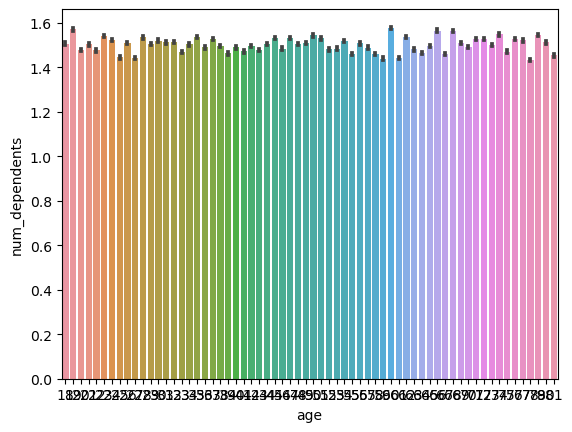

In [42]:
# Trying out a bar chart just for fun - result not so fun

age_fam_bar = sns.barplot(data = df_6, x = 'age', y = 'num_dependents')

### The line chart does not demonstrate a particularly strong relationsip between number of dependents and age. In fact, I would want to explore this data further, as some of the spikes in number of dependents are curious (i.e. a spike in number of dependents correlating with <20 years of age). 

## 7) Create a scatterplot using the sns.scatterplot() function

In [45]:
df_9 = big[['age','income']]

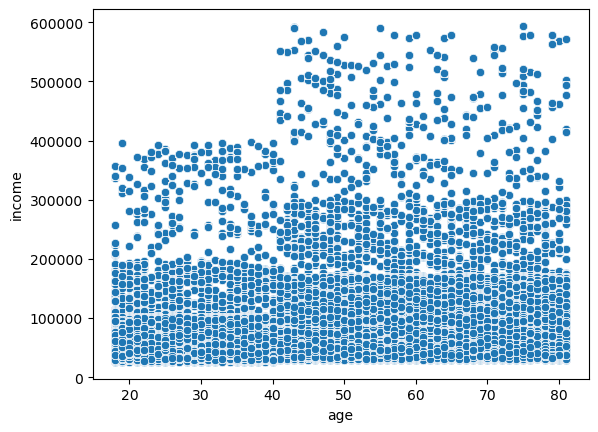

In [48]:
age_income_scatter = sns.scatterplot(data = df_9, x = 'age', y = 'income')

In [49]:
age_income_scatter.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_income_scatter.png'))

### Although the primary income level for all ages is below 200k, customers >=40 have a higher probability of making 300k, and the maximum income at >=40 increases from 400k to 600k. 

## 8) Export your visualizations as “.png” files in your relevant project folder

### Done throughout task above